___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1.Відкрийте файл та виведіть описову статистику

In [11]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [12]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


2.Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

<AxesSubplot:xlabel='fico', ylabel='Count'>

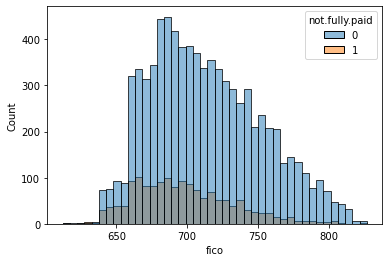

In [13]:
sns.histplot(data = df, hue = 'not.fully.paid', x = 'fico')

3.Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

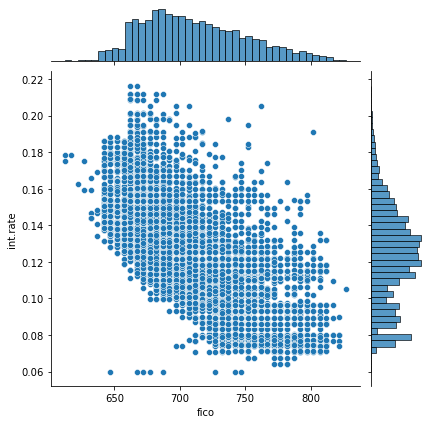

In [14]:
sns.jointplot(data = df, x = 'fico', y = 'int.rate')

4.Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

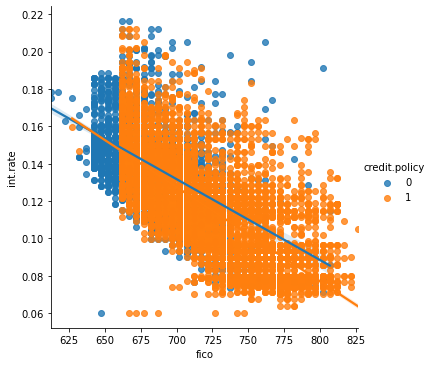

In [15]:
sns.lmplot(data = df, x = 'fico', y = 'int.rate', hue = 'credit.policy')

5.purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

In [16]:
df = pd.get_dummies (df, columns = ['purpose'])

6.Розбийте датасет на тестві та трейнові дані

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y = df["credit.policy"]
X = df.drop('credit.policy',axis=1)

7.Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

## Логістична регресія

In [38]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression (max_iter=1000)

In [39]:
y = df["credit.policy"]
X = df.drop('credit.policy',axis=1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train,y_train)

C:\Users\MON_UA1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
logistic_regression_model.score(X_train,y_train)


0.8739286270843073

In [24]:
logistic_regression_model.score(X_test,y_test)


0.8680797216070864

In [11]:
from sklearn.metrics import accuracy_score

In [26]:
test_predictions_logistic_regression = logistic_regression_model.predict(X_test)


In [30]:
from sklearn import metrics

In [32]:
result = metrics.classification_report(y_test,test_predictions_logistic_regression)
print(result)

              precision    recall  f1-score   support

           0       0.78      0.46      0.58       623
           1       0.88      0.97      0.92      2538

    accuracy                           0.87      3161
   macro avg       0.83      0.71      0.75      3161
weighted avg       0.86      0.87      0.85      3161



In [33]:
metrics.confusion_matrix(y_test,test_predictions_logistic_regression)

array([[ 286,  337],
       [  80, 2458]], dtype=int64)

In [35]:
metrics.accuracy_score(y_test,test_predictions_logistic_regression)

0.8680797216070864

## Дерево рішень

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
decision_tree_model = DecisionTreeClassifier(max_depth=10)

In [50]:
y = df["credit.policy"]
X = df.drop('credit.policy',axis=1)

In [52]:
decision_tree_model.fit(X_train,y_train)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [55]:
predictions = decision_tree_model.predict(X_test)

In [84]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [78]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       557
           1       0.99      0.99      0.99      2317

    accuracy                           0.99      2874
   macro avg       0.98      0.98      0.98      2874
weighted avg       0.99      0.99      0.99      2874



In [59]:
print(confusion_matrix(y_test,predictions))

[[ 537   20]
 [  16 2301]]


In [85]:
print (accuracy_score(y_test,predictions))

0.9874739039665971


## Random forest


In [68]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier ()

In [70]:
random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [71]:
test_predictions_random_forest = random_forest_model.predict(X_test)

In [90]:
random_forest_confusion_matrix = confusion_matrix(y_test,test_predictions_random_forest)
random_forest_confusion_matrix

array([[ 533,   24],
       [   5, 2312]], dtype=int64)

In [87]:
print(accuracy_score(y_test, test_predictions_random_forest))

0.9899095337508699


In [88]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       557
           1       0.99      0.99      0.99      2317

    accuracy                           0.99      2874
   macro avg       0.98      0.98      0.98      2874
weighted avg       0.99      0.99      0.99      2874



Concusion: The Model "Random forest"  has the accuracy score is  close to 1 and better than other models. So this model is  more precisely than others.

### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [37]:
import pandas as pd
import numpy as np
df = pd.read_csv('air_quality.csv')
df.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [25]:
df.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [38]:
import datetime
min(pd.to_datetime(df['date.utc'])), max(pd.to_datetime(df['date.utc']))

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [41]:
df.groupby([df.city,pd.to_datetime(df['date.utc']).dt.weekday]).mean()

value
city      date.utc           
Antwerpen 0         27.875000
          1         22.214286
          2         21.125000
          3         27.500000
          4         28.400000
          5         33.500000
          6         21.896552
London    0         23.969697
          1         24.885714
          2         23.460432
          3         24.780142
          4         26.446809
          5         24.977612
          6         24.859155
Paris     0         24.856250
          1         30.999359
          2         29.165753
          3         28.600690
          4         31.617986
          5         25.266154
          6         23.274306

<AxesSubplot:xlabel='date.utc'>

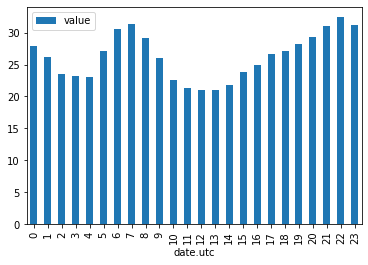

In [43]:
df.groupby([pd.to_datetime(df['date.utc']).dt.hour]).mean().plot.bar()